In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [37]:
df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')

In [38]:
df.drop(df.columns[[0,1,2,3,4,5,6]],axis=1,inplace=True)
df.head()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
0,10.201539,1.194664,16.223458,3.878000,0.152711,12.072452
1,7.165701,1.126752,10.460008,4.282238,0.161716,9.241155
2,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463
3,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200
4,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574


In [39]:
df.describe()

,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,11.641527,2.079628,72.804971,3.558793,0.072209,48.185793
std,5.612932,11.435278,155.033640,0.676312,0.052283,282.736653
min,0.000015,-217.560433,-3.123743,2.533930,0.000451,0.001400
25%,8.613273,0.755764,3.898699,3.088846,0.040015,12.262756
50%,10.966648,1.675090,10.341742,3.401205,0.060916,15.601842
75%,13.181021,3.197335,86.028008,3.831771,0.093534,21.528386
max,51.691800,33.318370,1734.146859,5.938324,0.259048,5957.198529


In [40]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
anat_cnr     13
anat_efc     13
anat_fber    13
anat_fwhm    13
anat_qi1     13
anat_snr     13
dtype: int64


In [41]:
X_features = np.load("features.npz")['a']

In [42]:
y_target = np.load("labels.npz")['a']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.20, random_state = 42, shuffle = True, # shuffle dataset
stratify = y_target)

In [52]:
logmodel_best = LogisticRegression(solver='saga', penalty='l2', C=0.1, max_iter=5, random_state=42)
logmodel_best.fit(X_train,y_train)
log_train_score = logmodel_best.score(X_train,y_train)*100
print(f'Training Accuracy for Logistic Regression is  {round(log_train_score, 2)} %')
y_pred_log = logmodel_best.predict(X_test)
log_reg = (metrics.accuracy_score(y_test, y_pred_log)*100)
print(f"Testing Accuracy for Logistic Regression is {round(log_reg, 2)} %")


Training Accuracy for Logistic Regression is  75.43 %
Testing Accuracy for Logistic Regression is 66.86 %


c:\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion matrix for logistic regression: 


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


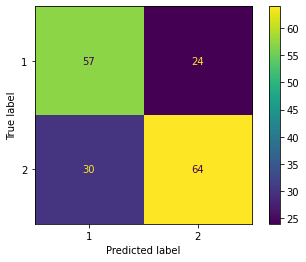

In [53]:
print("Confusion matrix for logistic regression: ")
plot_confusion_matrix(logmodel, X_test, y_test)  
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

print(metrics.classification_report(ytest, logmodel.predict(Xtest)))

print(accuracy_score(ytest, logmodel.predict(Xtest)))

              precision    recall  f1-score   support

           1       0.66      0.70      0.68        81
           2       0.73      0.68      0.70        94

    accuracy                           0.69       175
   macro avg       0.69      0.69      0.69       175
weighted avg       0.69      0.69      0.69       175

0.6914285714285714
